In [3]:
from visualizing import draw_graph, draw_overlap, draw_diffs
from simulating import *
import collections

%matplotlib notebook
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [40, 20]
mpl.rcParams['figure.dpi'] = 200

MC-Simulation von `I` Paths über `M` Zeitschritte

In [8]:
S = simulate_paths(sigma=0.2, M=4, I=100)
print(S[0:3,:])

[[100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.         100.         100.         100.         10

"Binning" von S, einmal durch Fixed Size Bins und durch K-Means
Ergebnis ist ein Dictionary der Form

`{'binX': {'t0': [Elemente von binX in t0], 't1':[Elemente von binX in t1]}, 'binX+1: {...}}`

In [11]:
fs_bins = pivot_bins(binning_S(S=S, method='fixed'))
kmeans_bins = pivot_bins(binning_S(S=S, method='kmeans'))
print(fs_bins["bin0"])

binning using kmeans:   0%|                                                                      | 0/5 [00:00<?, ?it/s]C:\Users\phili\Documents\University\IFM\binning\simulating.py:34: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0).fit(S_t.reshape(-1,1))
binning using kmeans: 100%|██████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.97it/s]

{'t0': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], 't1': [81.49035715149604, 86.17250033351236, 87.25565634553082, 88.06473930853737, 89.54723101043176, 90.55133202141718, 90.59788180803858, 91.10529535908834, 91.16190062833176, 91.17128251216093, 91.57496514548818, 91.59139490317939, 91.87501929423348, 92.04706293718084, 92.5764250817581, 93.01408983901554, 93.45603211902149, 94.1506057472733, 94.2410420674748, 94.45029979687666, 94.47310612785968, 94.81124186258101, 95.79329508615889, 96.00457376994858, 96.0798695766875], 't2': [79.78439727842894, 81.3850346086099, 81.59681807422726, 82.08951301477967, 82.72551340698284, 82.94471311663348, 83.03728187299387, 83.1956880160835, 85.66014975186273, 85.78232549595448, 86.13672745875704, 87.60106043182945, 88.96398811802896, 89.229723672013, 89.23937082512099, 89.79074479099735, 90.07141366708743, 90.08120665

In [12]:
S = simulate_paths(sigma=0.3, M=10, I=1000)

bin_S = binning_S(S=S, method='kmeans', nbins=5)

def create_edgelist(S, bin_S, unique_edges=True):
    res_array = []

    for p in range(len(S[0])):
        res_array.append([])
        for i in range(len(S)):
            cur_t = bin_S[f"t{i}"]
            for b in cur_t.keys():
                if min(cur_t[b]) <= S[i][p] <= max(cur_t[b]):
                    res_array[p].append(np.median(cur_t[b]))
                    break

    res_array = np.array(res_array).T.tolist()
    edgelist = []
    for i in range(len(res_array)):
        try:
            for x, y in zip(res_array[i], res_array[i+1]):
                counter = collections.Counter(zip(res_array[i], res_array[i+1]))
                s=0
                for k in counter.keys():
                    if x==k[0]:
                        s += counter[k]
                weight = counter[(float(x),float(y))]/s
                edgelist.append({"node_s": x, "node_e": y, "weight": weight, "position_s": (i, x), "position_e": (i+1, y)})
        except:
            pass
    if unique_edges:
        a = []
        for item in edgelist:
            if item not in a: a.append(item)
        return(a)
    return(edgelist)

binning using kmeans:   0%|                                                                     | 0/11 [00:00<?, ?it/s]C:\Users\phili\Documents\University\IFM\binning\simulating.py:34: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0).fit(S_t.reshape(-1,1))
binning using kmeans: 100%|████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  9.52it/s]


In [13]:
edgelist=create_edgelist(S, bin_S)

<IPython.core.display.Javascript object>


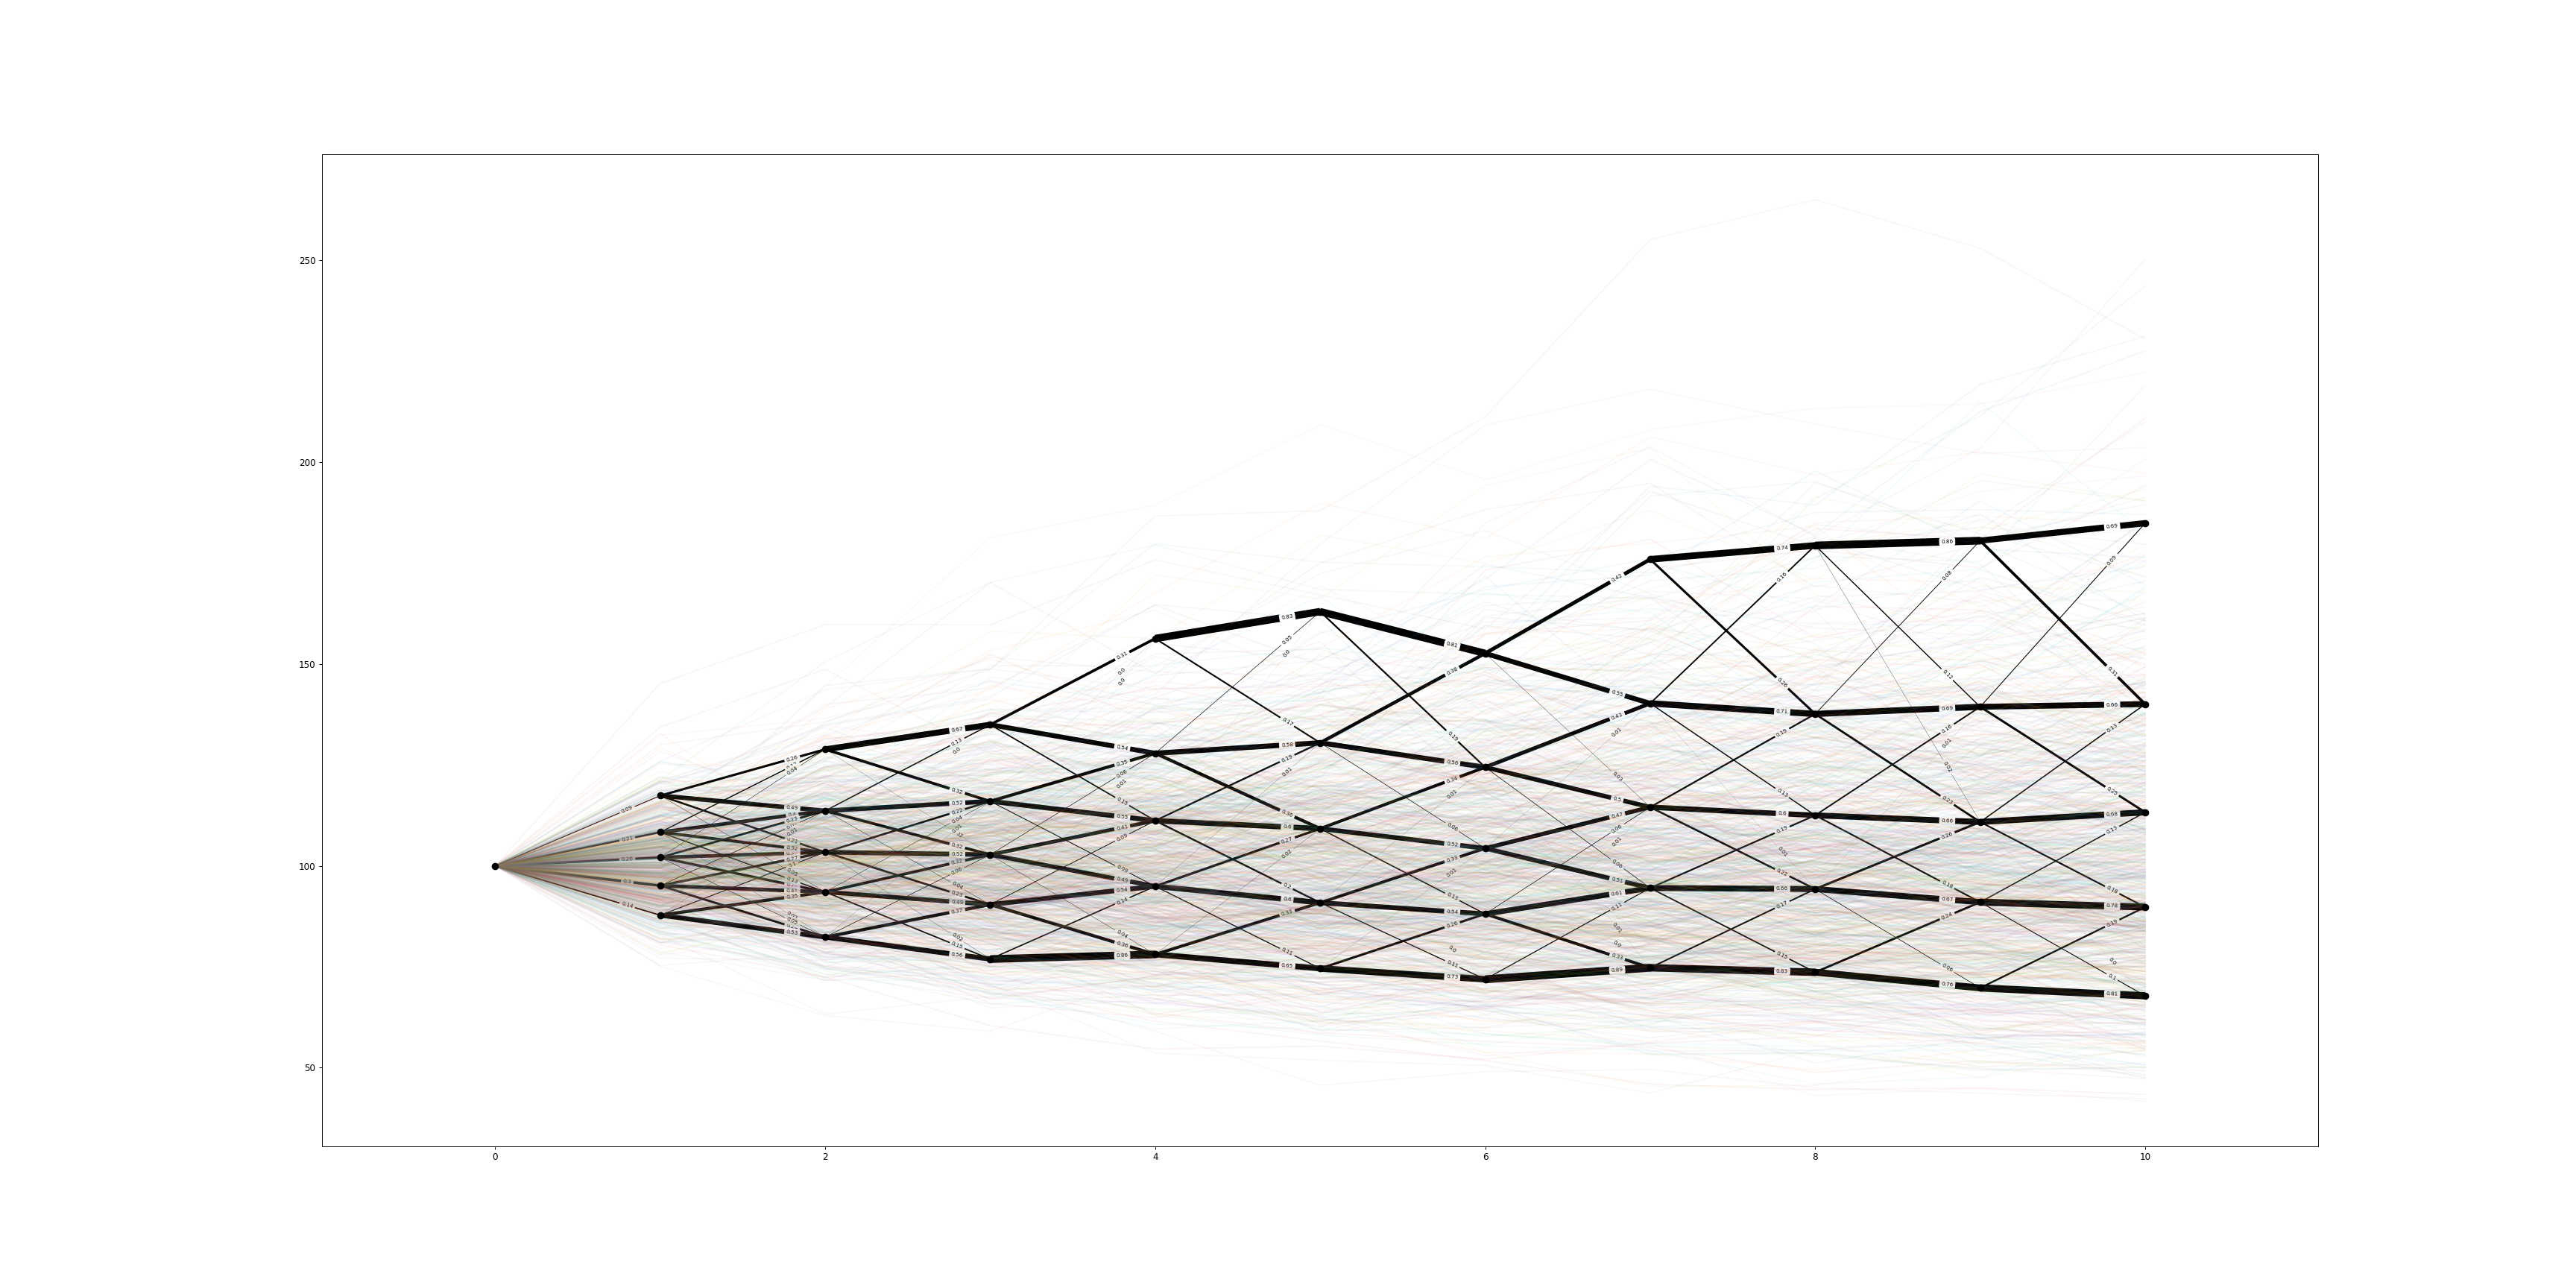

In [14]:

import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40, 20))
G = nx.Graph()
for i in edgelist:
    color = (400*i["weight"], 100, 100) if (i["node_s"] >= i["node_e"]) else (300*i["weight"], 100, 100)
    G.add_node(str(i["node_s"]), pos=i["position_s"], label=round(i["weight"], 0))
    G.add_node(str(i["node_e"]), pos=i["position_e"], label=round(i["weight"], 0))
    G.add_edge(str(i["node_s"]), str(i["node_e"]), width=i["weight"], color=color, labels=i["weight"])

ax.plot(S, alpha=.05)    

nx.draw(G,
        with_labels=False,
        node_size=50,
        node_color="black",
        pos=nx.get_node_attributes(G,'pos'),
        width=[G[u][v]['width']*10 for u,v in G.edges()],
        edge_color="black",
        node_shape="o")

nx.draw_networkx_edge_labels(
    G, pos=nx.get_node_attributes(G,'pos'),
    edge_labels= {(str(i["node_s"]), str(i["node_e"])): round(i["weight"], 2) for i in edgelist},
    label_pos=0.2,
    font_color='black',
    font_size=6
)

ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

plt.savefig("nx.svg")